## Summary: Heart Disease Risk Analysis
In this Project, I analysed the factors predicting heart disease. While we always assume that being older or having a high blood pressure are the main reason for heart disease, but the data shows a much more interesting insight:

* Age: Surprisingly, heart disease in this group was not just an elderly's problem. Most cases actually reported in people aged between 40 to 55, while many patients over the age of 60 remained perfectly.
* Blood Pressure: we found a patient with a blood pressure of 200 mmHg who was healthy, this proves that a single high level metric doesn't always provide enough for disease diagnosis. it's risk factor but not enough for a medical conclusion.
* Gender and Chest pain Type: Even the number of females are less, they are comparitively more prone to have disease than the males. Furthermore, Type 2 and Type 3 chest pain were much stronger indicators than the Type 1 chest pain.

Conclusion: We can't predict heart health by analysing a single metric. A combination of factors such as the gender, type of chest pain and their age is the determinants of a disease in an individual.





In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/heart-disease.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [7]:
df = df.rename(columns={'target': 'Heart Disease', 'trestbps': 'blood pressure', 'fbs': 'fasting blood pressure'})

In [8]:
df.describe()

,age,sex,cp,blood pressure,chol,fasting blood pressure,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


In [11]:
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})

In [14]:
df.head()

,age,sex,cp,blood pressure,chol,fasting blood pressure,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df['cp'].value_counts()

,count
cp,
Type 1,143
Type 3,87
Type 2,50
Type 4,23


In [17]:
df['cp'] = df['cp'].replace({0: 'Type 1', 1: 'Type 2', 2: 'Type 3', 3: 'Type 4'})

In [23]:
df['fasting blood pressure'].value_counts()

,count
fasting blood pressure,
0,258
1,45


In [24]:
df['exang'].value_counts()

,count
exang,
0,204
1,99


In [27]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
1,165
0,138


In [28]:
df['Heart Disease'] = df['Heart Disease'].replace({0: 'No', 1: 'Yes'})

In [14]:
import seaborn as sns

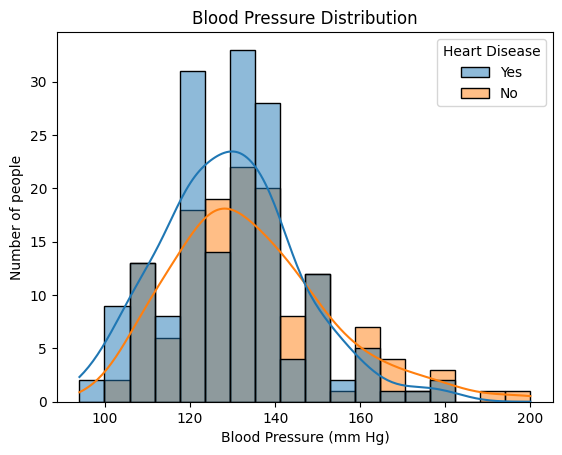

In [34]:
sns.histplot(data=df, x='blood pressure', kde=True, hue='Heart Disease', color='skyblue')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Number of people')
plt.show()

High blood pressure (140+ mm Hg) is a factor for heart disease but it is (180+ mmHg) not a must factor to cause heart disease. Because the outliers at 200 mm Hg are healthy. This means that diagnosis should be done in accordance with a combination of factors to predict the disease.

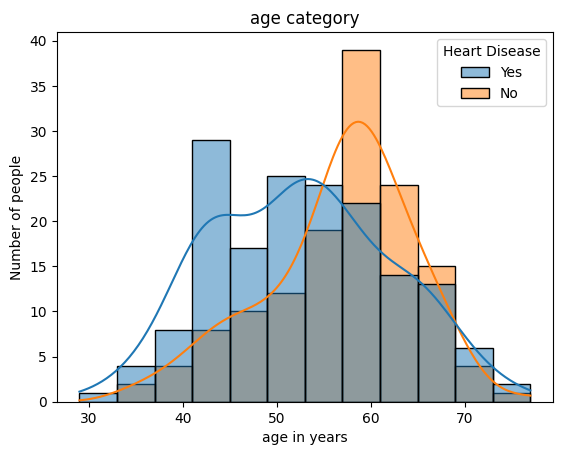

In [35]:
sns.histplot(data=df, x='age', kde=True, hue='Heart Disease', color='skyblue')
plt.title('age category')
plt.xlabel('age in years')
plt.ylabel('Number of people')
plt.show()

By analysing the age category, surprisingly, heart disease is more prevalent in the 40 to 55 years old individuals in this dataset. Interestingly, older 55+ years group has much healthy heart conditions. This again proves that single factor is not a must factor to have heart disease. For the diagonosis, multiple factors should be considered.

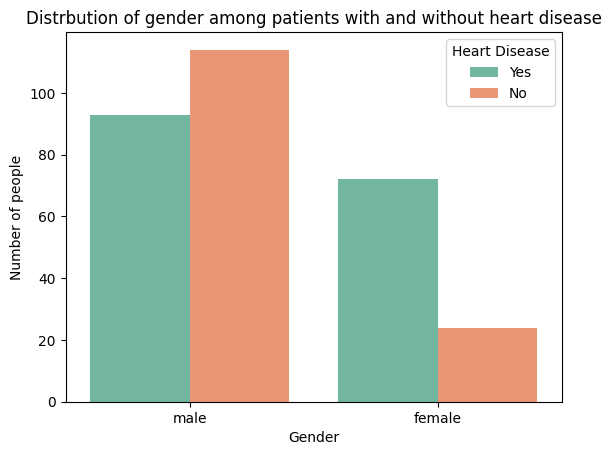

In [36]:
sns.countplot(data=df, x='sex', hue='Heart Disease', palette='Set2')
plt.title('Distrbution of gender among patients with and without heart disease')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

Even though the number of females (96) is smaller compared to males (207) in this dataset. The heart disease is comparatively more common in females. This suggests that, female are at significant risk within this patient group.

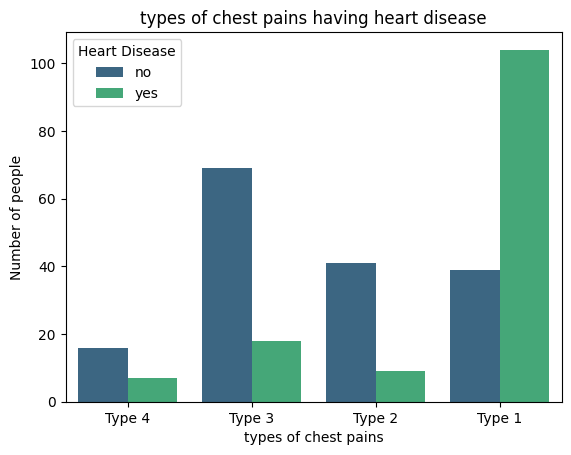

In [42]:
sns.countplot(data=df, x='cp', hue='Heart Disease', palette='viridis')
plt.title('types of chest pains having heart disease')
plt.xlabel('types of chest pains')
plt.ylabel('Number of people')
plt.legend(title='Heart Disease', labels=['no', 'yes'])
plt.show()

while the Type 1 chest pain is the most frequent types of chest pain,but it is more common in healthy individuals. Ironically, the Type 3 chest pain is less common among the patients, but act as a strong factor for heart disease diagnosis.

In [12]:
df.corr()

,age,sex,cp,blood pressure,chol,fasting blood pressure,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
age,1.000000,0.298364,-0.811228,0.871415,0.697977,0.441592,-0.760969,-0.927060,0.827847,0.886284,-0.892907,0.892598,0.704067,-0.867093
sex,0.298364,1.000000,-0.646416,0.160149,-0.149207,0.092623,-0.347014,-0.573260,0.669774,0.598843,-0.565255,0.603716,0.742028,-0.683162
cp,-0.811228,-0.646416,1.000000,-0.612214,-0.526820,-0.187544,0.608611,0.939909,-0.977459,-0.914492,0.882964,-0.923074,-0.927772,0.969615
blood pressure,0.871415,0.160149,-0.612214,1.000000,0.621897,0.539028,-0.775248,-0.751969,0.660121,0.761500,-0.785633,0.709465,0.532122,-0.709483
chol,0.697977,-0.149207,-0.526820,0.621897,1.000000,0.168202,-0.670189,-0.533488,0.488220,0.502586,-0.501756,0.511707,0.418265,-0.502424
fasting blood pressure,0.441592,0.092623,-0.187544,0.539028,0.168202,1.000000,-0.537288,-0.339541,0.250603,0.310299,-0.376343,0.380112,0.084224,-0.299263
restecg,-0.760969,-0.347014,0.608611,-0.775248,-0.670189,-0.537288,1.000000,0.668319,-0.643771,-0.674438,0.680631,-0.712127,-0.580894,0.694316
thalach,-0.927060,-0.573260,0.939909,-0.751969,-0.533488,-0.339541,0.668319,1.000000,-0.966085,-0.977310,0.970535,-0.948100,-0.870833,0.976820
exang,0.827847,0.669774,-0.977459,0.660121,0.488220,0.250603,-0.643771,-0.966085,1.000000,0.955815,-0.938219,0.912479,0.922299,-0.981869
oldpeak,0.886284,0.598843,-0.914492,0.761500,0.502586,0.310299,-0.674438,-0.977310,0.955815,1.000000,-0.994009,0.922055,0.884856,-0.972446


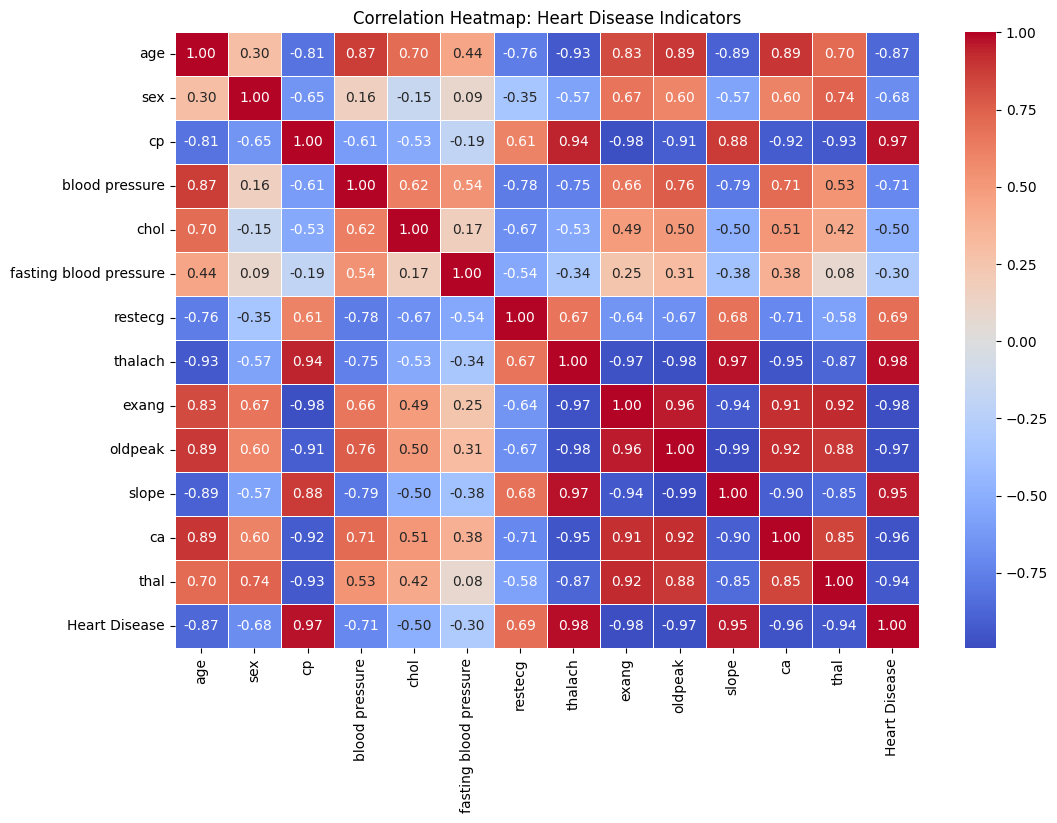

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Heart Disease Indicators')
plt.show()

In [19]:
plt.savefig('heart_disease_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>